# Set Up

## Init

### Installs

In [18]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Imports

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from google.colab import files
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


ModuleNotFoundError: No module named 'google'

In [ ]:
sns.set(rc={"figure.figsize":(16, 7)})

In [ ]:
figure(num=None,figsize=(150,100),dpi=120,facecolor='w',edgecolor='k')

<Figure size 18000x12000 with 0 Axes>

<Figure size 18000x12000 with 0 Axes>

### Load CSV into Dataframe

In [ ]:
#uploaded = files.upload()

NameError: name 'files' is not defined

In [ ]:
df = pd.read_csv('retention-analysis -absolute-calender-weeks.csv').fillna(0)
df.head(7)

,Cohorts,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember
0,January,3,3,0,0,1,0,1,2,1,2,1,1
1,February,0,12,8,7,8,5,4,4,7,5,4,2
2,March,0,0,18,13,11,5,9,7,7,7,4,4
3,April,0,0,0,37,18,5,11,8,12,9,8,9
4,May,0,0,0,0,35,9,15,12,15,14,15,12
5,June,0,0,0,0,0,12,6,4,6,1,4,1
6,July,0,0,0,0,0,0,13,7,7,5,5,4


### Load Google Sheet into dataframe (for Colab)
Place the Colab file in the same folder as the Gsheet

In [ ]:
#from google.colab import auth
#auth.authenticate_user()

In [ ]:
#from google.auth import default
#import gspread
#creds, _ = default()
#gc = gspread.authorize(creds)

In [ ]:
#worksheet = gc.open('Retention Analysis').sheet1
#df = worksheet.get_all_records()
#print(gsheet)

[{'Cohorts': 'February 22', 'Februar 22': 3, 'März 22': 3, 'April 22': 0, 'Mai 22': 0, 'Juni 22': 1, 'Juli 22': 0, 'August 22': 0, 'September 22': 1, 'Oktober 22': 2, 'November 22': 1, 'Dezember 22': 2, 'Januar 23': 2, 'Februar 23': 2}, {'Cohorts': 'March 22', 'Februar 22': 0, 'März 22': 12, 'April 22': 8, 'Mai 22': 7, 'Juni 22': 8, 'Juli 22': 0, 'August 22': 5, 'September 22': 4, 'Oktober 22': 4, 'November 22': 7, 'Dezember 22': 5, 'Januar 23': 3, 'Februar 23': 4}, {'Cohorts': 'April 22', 'Februar 22': 0, 'März 22': 0, 'April 22': 18, 'Mai 22': 13, 'Juni 22': 11, 'Juli 22': 0, 'August 22': 5, 'September 22': 9, 'Oktober 22': 7, 'November 22': 7, 'Dezember 22': 7, 'Januar 23': 6, 'Februar 23': 9}, {'Cohorts': 'May 22', 'Februar 22': 0, 'März 22': 0, 'April 22': 0, 'Mai 22': 37, 'Juni 22': 18, 'Juli 22': 0, 'August 22': 5, 'September 22': 11, 'Oktober 22': 8, 'November 22': 12, 'Dezember 22': 9, 'Januar 23': 9, 'Februar 23': 11}, {'Cohorts': 'June 22', 'Februar 22': 0, 'März 22': 0, 'Ap

### Functions

In [ ]:
def get_retention(dataframe):
  s = pd.Series(cohort_retention_percentage_weekscount.iloc[0])
  for i in range(len(dataframe)):
    s.iloc[i] = dataframe.T.iloc[i,0:].sum(axis=0)/dataframe.T.iloc[i,0:].notnull().sum()
  return s

# Create Cohort Charts

In [ ]:
cohort_absolute_calendarweeks = pd.DataFrame(df).set_index(['Cohorts']) 
# Mulit Index: cohort_absolute_calendarweeks.set_index([pd.Index(cohort_absolute_calendarweeks.index), 'Cohorts'])
cohort_absolute_calendarweeks.name='Cohorts Absolute Calendar Weeks'
cohort_absolute_calendarweeks.fillna(0).replace([np.inf, -np.inf], 0, inplace=True)
cohort_absolute_calendarweeks

,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember
Cohorts,,,,,,,,,,,,
January,3,3,0,0,1,0,1,2,1,2,1,1
February,0,12,8,7,8,5,4,4,7,5,4,2
March,0,0,18,13,11,5,9,7,7,7,4,4
April,0,0,0,37,18,5,11,8,12,9,8,9
May,0,0,0,0,35,9,15,12,15,14,15,12
June,0,0,0,0,0,12,6,4,6,1,4,1
July,0,0,0,0,0,0,13,7,7,5,5,4
August,0,0,0,0,0,0,0,12,11,8,7,1
September,0,0,0,0,0,0,0,0,81,40,34,9


In [ ]:
cohort_relative_calendarweeks = pd.DataFrame(columns=[cohort_absolute_calendarweeks.columns], index=cohort_absolute_calendarweeks.index)
for i in range(len(cohort_absolute_calendarweeks)): 
  cohort_relative_calendarweeks.iloc[i] = cohort_absolute_calendarweeks.iloc[i].diff().fillna(cohort_absolute_calendarweeks.iloc[i])
cohort_relative_calendarweeks.name='Cohorts Relative Calendar Weeks'
cohort_relative_calendarweeks.replace([np.inf, -np.inf], 0, inplace=True)
cohort_relative_calendarweeks

,Februar 22,März 22,April 22,Mai 22,Juni 22,Juli 22,August 22,September 22,Oktober 22,November 22,Dezember 22,Januar 23,Februar 23
Cohorts,,,,,,,,,,,,,
February 22,3.0,0.0,-3.0,0.0,1.0,-1.0,0.0,1.0,1.0,-1.0,1.0,0.0,0.0
March 22,0.0,12.0,-4.0,-1.0,1.0,-8.0,5.0,-1.0,0.0,3.0,-2.0,-2.0,1.0
April 22,0.0,0.0,18.0,-5.0,-2.0,-11.0,5.0,4.0,-2.0,0.0,0.0,-1.0,3.0
May 22,0.0,0.0,0.0,37.0,-19.0,-18.0,5.0,6.0,-3.0,4.0,-3.0,0.0,2.0
June 22,0.0,0.0,0.0,0.0,35.0,-35.0,9.0,6.0,-3.0,3.0,-1.0,-3.0,1.0
July 22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
August 22,0.0,0.0,0.0,0.0,0.0,0.0,12.0,-6.0,-2.0,2.0,-5.0,1.0,0.0
September 22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,-6.0,0.0,-2.0,3.0,-1.0
October 22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,-1.0,-3.0,-2.0,2.0


In [ ]:
cohort_retention_percentage_calendarweeks = pd.DataFrame(columns=[cohort_absolute_calendarweeks.columns], index=cohort_absolute_calendarweeks.index)
for i in range(len(cohort_absolute_calendarweeks)):
  cohort_retention_percentage_calendarweeks.iloc[i] = cohort_absolute_calendarweeks.iloc[i].div(cohort_absolute_calendarweeks.iloc[i].values[i])
cohort_retention_percentage_calendarweeks.name='Cohorts Retention Percentage Calendar Weeks'
cohort_retention_percentage_calendarweeks.replace([np.inf, -np.inf], 0, inplace=True)
cohort_retention_percentage_calendarweeks

,Februar 22,März 22,April 22,Mai 22,Juni 22,Juli 22,August 22,September 22,Oktober 22,November 22,Dezember 22,Januar 23,Februar 23
Cohorts,,,,,,,,,,,,,
February 22,1.0,1.0,0.000000,0.000000,0.333333,0.0,0.000000,0.333333,0.666667,0.333333,0.666667,0.666667,0.666667
March 22,0.0,1.0,0.666667,0.583333,0.666667,0.0,0.416667,0.333333,0.333333,0.583333,0.416667,0.250000,0.333333
April 22,0.0,0.0,1.000000,0.722222,0.611111,0.0,0.277778,0.500000,0.388889,0.388889,0.388889,0.333333,0.500000
May 22,0.0,0.0,0.000000,1.000000,0.486486,0.0,0.135135,0.297297,0.216216,0.324324,0.243243,0.243243,0.297297
June 22,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.257143,0.428571,0.342857,0.428571,0.400000,0.314286,0.342857
July 22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 22,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.500000,0.333333,0.500000,0.083333,0.166667,0.166667
September 22,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.538462,0.538462,0.384615,0.615385,0.538462
October 22,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.916667,0.666667,0.500000,0.666667


In [ ]:
cohort_churn_percentage_calendarweeks = pd.DataFrame(columns=[cohort_absolute_calendarweeks.columns], index=cohort_absolute_calendarweeks.index)
for i in range(len(cohort_absolute_calendarweeks)):
  cohort_churn_percentage_calendarweeks.iloc[i] = 1-(cohort_absolute_calendarweeks.iloc[i].div(cohort_absolute_calendarweeks.iloc[i].values[i]))
cohort_churn_percentage_calendarweeks.name='Cohorts Retention Percentage Calendar Weeks'
cohort_churn_percentage_calendarweeks.replace([np.inf, -np.inf], 0, inplace=True)
cohort_churn_percentage_calendarweeks

,Februar 22,März 22,April 22,Mai 22,Juni 22,Juli 22,August 22,September 22,Oktober 22,November 22,Dezember 22,Januar 23,Februar 23
Cohorts,,,,,,,,,,,,,
February 22,0.0,0.0,1.000000,1.000000,0.666667,1.0,1.000000,0.666667,0.333333,0.666667,0.333333,0.333333,0.333333
March 22,1.0,0.0,0.333333,0.416667,0.333333,1.0,0.583333,0.666667,0.666667,0.416667,0.583333,0.750000,0.666667
April 22,1.0,1.0,0.000000,0.277778,0.388889,1.0,0.722222,0.500000,0.611111,0.611111,0.611111,0.666667,0.500000
May 22,1.0,1.0,1.000000,0.000000,0.513514,1.0,0.864865,0.702703,0.783784,0.675676,0.756757,0.756757,0.702703
June 22,1.0,1.0,1.000000,1.000000,0.000000,1.0,0.742857,0.571429,0.657143,0.571429,0.600000,0.685714,0.657143
July 22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 22,1.0,1.0,1.000000,1.000000,1.000000,1.0,0.000000,0.500000,0.666667,0.500000,0.916667,0.833333,0.833333
September 22,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,0.000000,0.461538,0.461538,0.615385,0.384615,0.461538
October 22,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.083333,0.333333,0.500000,0.333333


In [ ]:
cohort_absolute_weekscount = pd.DataFrame(columns=[cohort_absolute_calendarweeks.columns.get_loc(c) for c in cohort_absolute_calendarweeks.columns if c in cohort_absolute_calendarweeks], index=cohort_absolute_calendarweeks.index)
for i in range(len(cohort_absolute_calendarweeks)): 
  s = pd.Series(cohort_absolute_calendarweeks.iloc[i].values[i:])
  for j in range(len(s)):
    cohort_absolute_weekscount.iloc[i].values[j] = s.iloc[j]
cohort_absolute_weekscount.name='Cohorts Absolute Weeks Count'
cohort_absolute_weekscount.replace([np.inf, -np.inf], 0, inplace=True)
cohort_absolute_weekscount

,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohorts,,,,,,,,,,,,,
February 22,3,3.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0
March 22,12,8.0,7.0,8.0,0.0,5.0,4.0,4.0,7.0,5.0,3.0,4.0,NaN
April 22,18,13.0,11.0,0.0,5.0,9.0,7.0,7.0,7.0,6.0,9.0,NaN,NaN
May 22,37,18.0,0.0,5.0,11.0,8.0,12.0,9.0,9.0,11.0,NaN,NaN,NaN
June 22,35,0.0,9.0,15.0,12.0,15.0,14.0,11.0,12.0,NaN,NaN,NaN,NaN
July 22,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
August 22,12,6.0,4.0,6.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
September 22,13,7.0,7.0,5.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
October 22,12,11.0,8.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_relative_weekscount = pd.DataFrame(columns=[cohort_absolute_calendarweeks.columns.get_loc(c) for c in cohort_absolute_calendarweeks.columns if c in cohort_absolute_calendarweeks], index=cohort_absolute_calendarweeks.index)
for i in range(len(cohort_relative_calendarweeks)): 
  s = pd.Series(cohort_relative_calendarweeks.iloc[i].values[i:])
  for j in range(len(s)):
    cohort_relative_weekscount.iloc[i].values[j] = s.iloc[j]
cohort_relative_weekscount.name='Cohorts Relative Weeks Count'
cohort_relative_weekscount.replace([np.inf, -np.inf], 0, inplace=True)
cohort_relative_weekscount

,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohorts,,,,,,,,,,,,,
February 22,3.0,0.0,-3.0,0.0,1.0,-1.0,0.0,1.0,1.0,-1.0,1.0,0.0,0.0
March 22,12.0,-4.0,-1.0,1.0,-8.0,5.0,-1.0,0.0,3.0,-2.0,-2.0,1.0,NaN
April 22,18.0,-5.0,-2.0,-11.0,5.0,4.0,-2.0,0.0,0.0,-1.0,3.0,NaN,NaN
May 22,37.0,-19.0,-18.0,5.0,6.0,-3.0,4.0,-3.0,0.0,2.0,NaN,NaN,NaN
June 22,35.0,-35.0,9.0,6.0,-3.0,3.0,-1.0,-3.0,1.0,NaN,NaN,NaN,NaN
July 22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
August 22,12.0,-6.0,-2.0,2.0,-5.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
September 22,13.0,-6.0,0.0,-2.0,3.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
October 22,12.0,-1.0,-3.0,-2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_retention_percentage_weekscount = pd.DataFrame(columns=[cohort_absolute_calendarweeks.columns.get_loc(c) for c in cohort_absolute_calendarweeks.columns if c in cohort_absolute_calendarweeks], index=cohort_absolute_calendarweeks.index)
for i in range(len(cohort_retention_percentage_calendarweeks)): 
  s = pd.Series(cohort_retention_percentage_calendarweeks.iloc[i].values[i:])
  for j in range(len(s)):
    cohort_retention_percentage_weekscount.iloc[i].values[j] = s.iloc[j]
cohort_retention_percentage_weekscount.name='Cohorts Retention Percentage Weeks Count'
cohort_retention_percentage_weekscount.replace([np.inf, -np.inf], 0, inplace=True)
cohort_retention_percentage_weekscount

,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohorts,,,,,,,,,,,,,
February 22,1.0,1.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.666667,0.333333,0.666667,0.666667,0.666667
March 22,1.0,0.666667,0.583333,0.666667,0.000000,0.416667,0.333333,0.333333,0.583333,0.416667,0.250000,0.333333,NaN
April 22,1.0,0.722222,0.611111,0.000000,0.277778,0.500000,0.388889,0.388889,0.388889,0.333333,0.500000,NaN,NaN
May 22,1.0,0.486486,0.000000,0.135135,0.297297,0.216216,0.324324,0.243243,0.243243,0.297297,NaN,NaN,NaN
June 22,1.0,0.000000,0.257143,0.428571,0.342857,0.428571,0.400000,0.314286,0.342857,NaN,NaN,NaN,NaN
July 22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 22,1.0,0.500000,0.333333,0.500000,0.083333,0.166667,0.166667,NaN,NaN,NaN,NaN,NaN,NaN
September 22,1.0,0.538462,0.538462,0.384615,0.615385,0.538462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
October 22,1.0,0.916667,0.666667,0.500000,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def calc_retention(dataframe): 
  s = pd.Series(cohort_retention_percentage_weekscount.iloc[0])
  for i in range(len(dataframe)):
    s.iloc[i] = dataframe.T.iloc[i,0:].sum(axis=0)/dataframe.T.iloc[i,0:].notnull().sum()
  return s

In [ ]:
calc_retention(cohort_retention_percentage_weekscount)

0     1.000000
1     0.559547
2     0.385425
3     0.341309
4     0.327081
5     0.323798
6     0.268869
7     0.322617
8     0.444998
9     0.345158
10    0.472222
11    0.500000
12    0.666667
Name: February 22, dtype: float64

In [ ]:
cohort_churn_percentage_weekscount = pd.DataFrame(columns=[cohort_absolute_calendarweeks.columns.get_loc(c) for c in cohort_absolute_calendarweeks.columns if c in cohort_absolute_calendarweeks], index=cohort_absolute_calendarweeks.index)
for i in range(len(cohort_churn_percentage_calendarweeks)): 
  s = pd.Series(cohort_churn_percentage_calendarweeks.iloc[i].values[i:])
  for j in range(len(s)):
    cohort_churn_percentage_weekscount.iloc[i].values[j] = s.iloc[j]
cohort_churn_percentage_weekscount.name='Cohorts Churn Percentage Weeks Count'
cohort_churn_percentage_weekscount.replace([np.inf, -np.inf], 0, inplace=True)
cohort_churn_percentage_weekscount

,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohorts,,,,,,,,,,,,,
February 22,0.0,0.000000,1.000000,1.000000,0.666667,1.000000,1.000000,0.666667,0.333333,0.666667,0.333333,0.333333,0.333333
March 22,0.0,0.333333,0.416667,0.333333,1.000000,0.583333,0.666667,0.666667,0.416667,0.583333,0.750000,0.666667,NaN
April 22,0.0,0.277778,0.388889,1.000000,0.722222,0.500000,0.611111,0.611111,0.611111,0.666667,0.500000,NaN,NaN
May 22,0.0,0.513514,1.000000,0.864865,0.702703,0.783784,0.675676,0.756757,0.756757,0.702703,NaN,NaN,NaN
June 22,0.0,1.000000,0.742857,0.571429,0.657143,0.571429,0.600000,0.685714,0.657143,NaN,NaN,NaN,NaN
July 22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 22,0.0,0.500000,0.666667,0.500000,0.916667,0.833333,0.833333,NaN,NaN,NaN,NaN,NaN,NaN
September 22,0.0,0.461538,0.461538,0.615385,0.384615,0.461538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
October 22,0.0,0.083333,0.333333,0.500000,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## User Activities

### Active Users

In [ ]:
active_users = pd.DataFrame(cohort_absolute_calendarweeks.sum(axis=0).astype(int), columns=['Active Users']).astype(object).T
active_users.name='Active Users'
active_users.replace([np.inf, -np.inf], 0, inplace=True)
active_users.fillna(0, inplace = True)
active_users

,Februar 22,März 22,April 22,Mai 22,Juni 22,Juli 22,August 22,September 22,Oktober 22,November 22,Dezember 22,Januar 23,Februar 23
Active Users,3,15,26,57,73,0,36,59,56,147,118,151,199


### Churned Users

In [ ]:
churned_users = pd.DataFrame(cohort_relative_calendarweeks[cohort_relative_calendarweeks < 0].sum(axis=0).astype(int), columns=['Churned Users']).astype(object).T
churned_users.name='Churned Users'
churned_users.columns=active_users.columns
churned_users.replace([np.inf, -np.inf], 0, inplace=True)
churned_users.fillna(0, inplace = True)
churned_users

,Februar 22,März 22,April 22,Mai 22,Juni 22,Juli 22,August 22,September 22,Oktober 22,November 22,Dezember 22,Januar 23,Februar 23
Churned Users,0,0,-7,-6,-21,-73,0,-7,-16,-2,-57,-34,-35


### New Users

In [ ]:
new_users = pd.DataFrame(cohort_relative_calendarweeks[cohort_relative_calendarweeks < 0].sum(axis=0).astype(int), columns=['New Users']).astype(object).T
for i in range(len(cohort_absolute_calendarweeks)):
  new_users.iloc[0].values[i]=cohort_absolute_calendarweeks.iloc[i].values[i]
  #print(cohort_absolute_calendarweeks.iloc[i].values[i])
new_users.columns=active_users.columns
new_users.replace([np.inf, -np.inf], 0, inplace=True)
new_users.fillna(0, inplace = True)
new_users

,Februar 22,März 22,April 22,Mai 22,Juni 22,Juli 22,August 22,September 22,Oktober 22,November 22,Dezember 22,Januar 23,Februar 23
New Users,3,12,18,37,35,0,12,13,12,81,27,63,65


### Resurrected Users

In [ ]:
resurrected_users = pd.DataFrame(cohort_relative_calendarweeks[cohort_relative_calendarweeks > 0].sum(axis=0).astype(int), columns=['Resurrected Users']).astype(object)
for i in range(len(cohort_absolute_calendarweeks)):
  resurrected_users.iloc[i] = resurrected_users.iloc[i]-cohort_absolute_calendarweeks.iloc[i].values[i]
resurrected_users =resurrected_users.T
resurrected_users.columns=active_users.columns
resurrected_users.replace([np.inf, -np.inf], 0, inplace=True)
resurrected_users.fillna(0, inplace = True)
resurrected_users

,Februar 22,März 22,April 22,Mai 22,Juni 22,Juli 22,August 22,September 22,Oktober 22,November 22,Dezember 22,Januar 23,Februar 23
Resurrected Users,0,0,0,0,2,0,24,17,1,12,1,4,18


### Retained Users

In [ ]:
retained_users = pd.DataFrame(active_users, columns=active_users.columns).astype(object)
for i in range(len(retained_users)):
  retained_users.iloc[i]=active_users.iloc[i]-new_users.iloc[i]-resurrected_users.iloc[i]
retained_users.replace([np.inf, -np.inf], 0, inplace=True)
retained_users.fillna(0, inplace = True)
retained_users.index = ['Retained Users']
retained_users

,Februar 22,März 22,April 22,Mai 22,Juni 22,Juli 22,August 22,September 22,Oktober 22,November 22,Dezember 22,Januar 23,Februar 23
Retained Users,0,3,8,20,36,0,0,29,43,54,90,84,116


### Quick Ratio

In [ ]:
quick_ratio = pd.DataFrame(cohort_relative_calendarweeks[cohort_relative_calendarweeks < 0].sum(axis=0).astype(int), columns=['Quick Ratio']).astype(object).T
for i in range(len(cohort_absolute_calendarweeks)):
  quick_ratio.iloc[0].values[i]=(new_users.iloc[0].values[i]+resurrected_users.iloc[0].values[i])/(churned_users.iloc[0].values[i]*-1)
quick_ratio.columns=active_users.columns
quick_ratio.replace([np.inf, -np.inf], 0, inplace=True)
quick_ratio.fillna(0, inplace = True)
quick_ratio

<ipython-input-246-047acbe267ad>:3: RuntimeWarning: divide by zero encountered in long_scalars
  quick_ratio.iloc[0].values[i]=(new_users.iloc[0].values[i]+resurrected_users.iloc[0].values[i])/(churned_users.iloc[0].values[i]*-1)


,Februar 22,März 22,April 22,Mai 22,Juni 22,Juli 22,August 22,September 22,Oktober 22,November 22,Dezember 22,Januar 23,Februar 23
Quick Ratio,0,0,2.571429,6.166667,1.761905,0.0,0,4.285714,0.8125,46.5,0.491228,1.970588,2.371429


### User Activity

In [ ]:
user_activity = pd.DataFrame(columns=[cohort_absolute_calendarweeks.columns], index=["Active Users", "Retained Users", "New Users","Churned Users", "Resurrected Users"])
user_activity.loc['Active Users']=active_users.iloc[0].values
user_activity.loc['New Users']=new_users.iloc[0].values
user_activity.loc['Retained Users']=retained_users.iloc[0].values
user_activity.loc['Churned Users']=churned_users.iloc[0].values
user_activity.loc['Resurrected Users']=resurrected_users.iloc[0].values
user_activity.loc['Quick Ratio']=quick_ratio.iloc[0].values
user_activity

,Februar 22,März 22,April 22,Mai 22,Juni 22,Juli 22,August 22,September 22,Oktober 22,November 22,Dezember 22,Januar 23,Februar 23
Active Users,3,15,26,57,73,0,36,59,56,147,118,151,199
Retained Users,0,3,8,20,36,0,0,29,43,54,90,84,116
New Users,3,12,18,37,35,0,12,13,12,81,27,63,65
Churned Users,0,0,-7,-6,-21,-73,0,-7,-16,-2,-57,-34,-35
Resurrected Users,0,0,0,0,2,0,24,17,1,12,1,4,18
Quick Ratio,0.0,0.0,2.571429,6.166667,1.761905,0.0,0.0,4.285714,0.8125,46.5,0.491228,1.970588,2.371429


### User Retention

In [ ]:
get_retention(cohort_retention_percentage_weekscount)

0     1.000000
1     0.519506
2     0.423967
3     0.379232
4     0.326300
5     0.370054
6     0.313680
7     0.320474
8     0.400664
9     0.348114
10    0.407407
11    0.416667
12    0.666667
Name: February 22, dtype: float64

# Retention Plotting

## User Activity

### Active Users Chart
This chart tells you how many users have been active in each time period (months, weeks, or days).

#### What you want to see
* **Each single timeperiod should ideally have a higher bar then the timeperiod before**
* **Ideally this chart should show an overall upwards trend:** indicating growth

#### What you don't want to see
* **Overall downward trend or stagnation:** You are either loosing a lot of users, or not gaining new ones
* **Drops in one or more time periods:** This can indicate a bug, security issue, low performing acquisition, etc.


Text(0.5, 0.5, 'Alexandros Shomper')

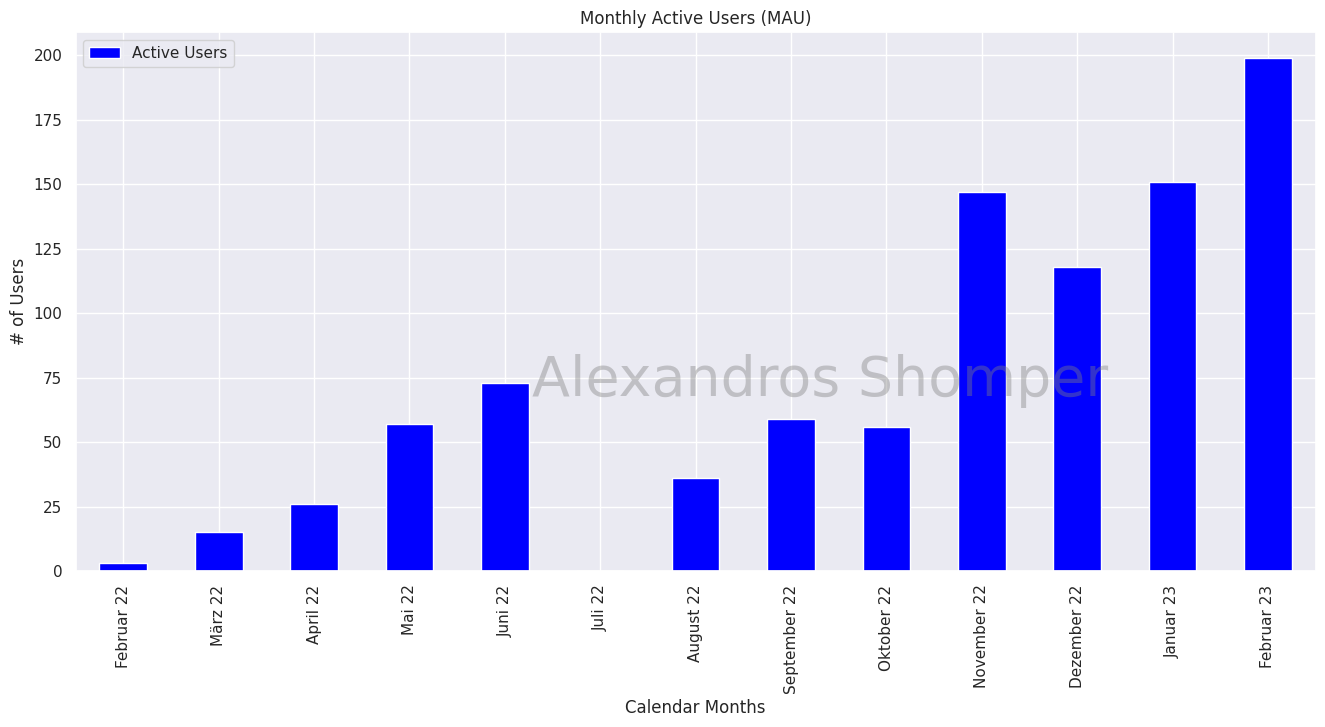

In [ ]:
active_users_chart = active_users.T.plot(kind='bar', color='blue').set(title='Monthly Active Users (MAU)', xlabel='Calendar Months', ylabel='# of Users')
plt.text(0.5, 0.5, 'Alexandros Shomper', transform=ax.transAxes, fontsize=40, color='gray', alpha=0.4, ha='center', va='center', rotation=0, zorder=1)

### Lifecycle Chart
*Aggregated charts can hide users churning!*

*While the "Active Users Chart" can give high-level indication of your products health & growth, it lacks the granularity to really understand what is happening.*

The Lifecycle Chart adds this granularity and tells you:
1. How many of those active users are new users.
2. How many are retained users.
3. How many users have churned (not used the product)
4. How many users were resurrected (started using the product again).

#### What you want to see
* **Majority is retained users:** Your product is keeping its users, which means they see value in it.
* **Retained users grow over timeperiod** You convince more and more users to stick around, maybe existing users are referring your product. Retaining the same amout of users over 6 months is not good enough. 

#### What you don't want to see
* **New users overweighing retained users:** Your user activity relies on constantly acquiring new users. This is not sustainable growth.
* **Churned users overweighting New Users:** You are loosing more users than you gain new users. This is a leaking bucket.

Text(0.5, 0.5, 'Alexandros Shomper')

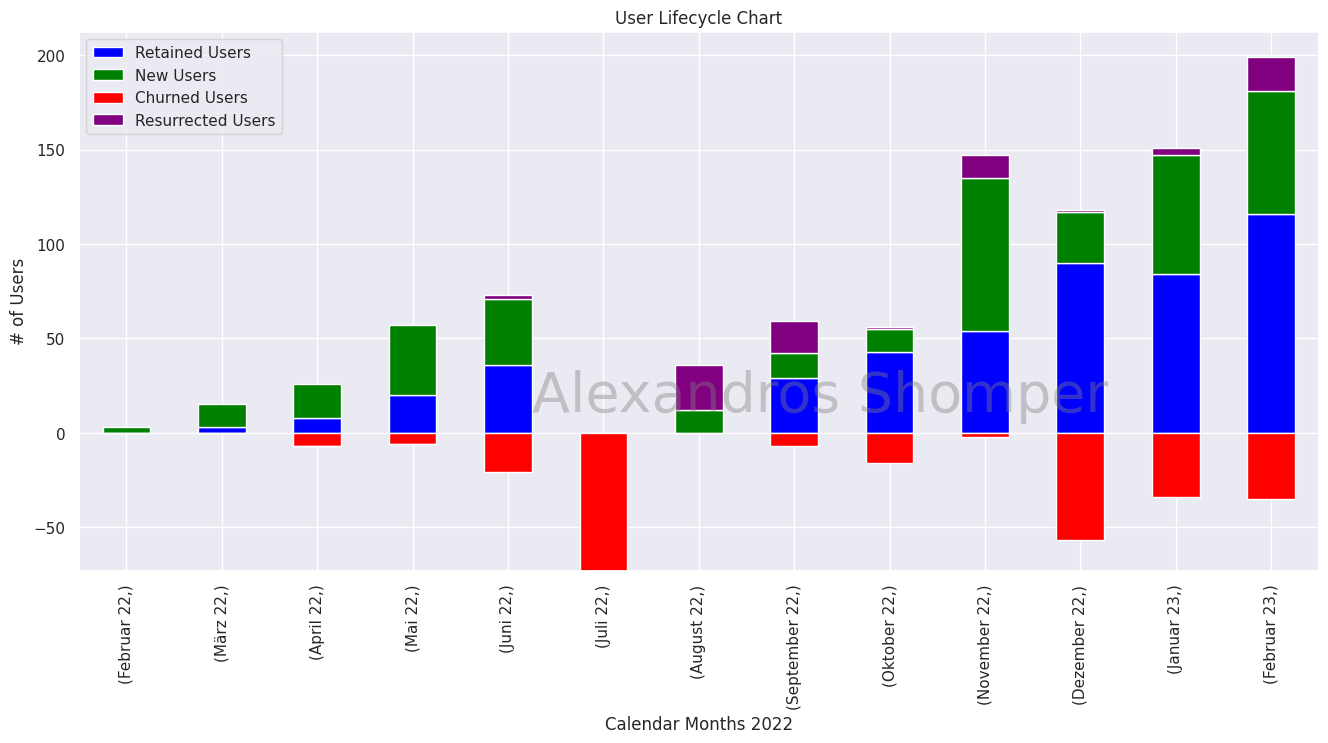

In [ ]:
lifecycle_chart = user_activity.loc['Retained Users':'Resurrected Users'].T.plot(kind='bar', stacked=True, color=['blue', 'green','red','purple']).set(title='User Lifecycle Chart', xlabel='Calendar Months 2022', ylabel='# of Users')
plt.text(0.5, 0.5, 'Alexandros Shomper', transform=ax.transAxes, fontsize=40, color='gray', alpha=0.4, ha='center', va='center', rotation=0, zorder=1)

Text(0.5, 0.5, 'Alexandros Shomper')

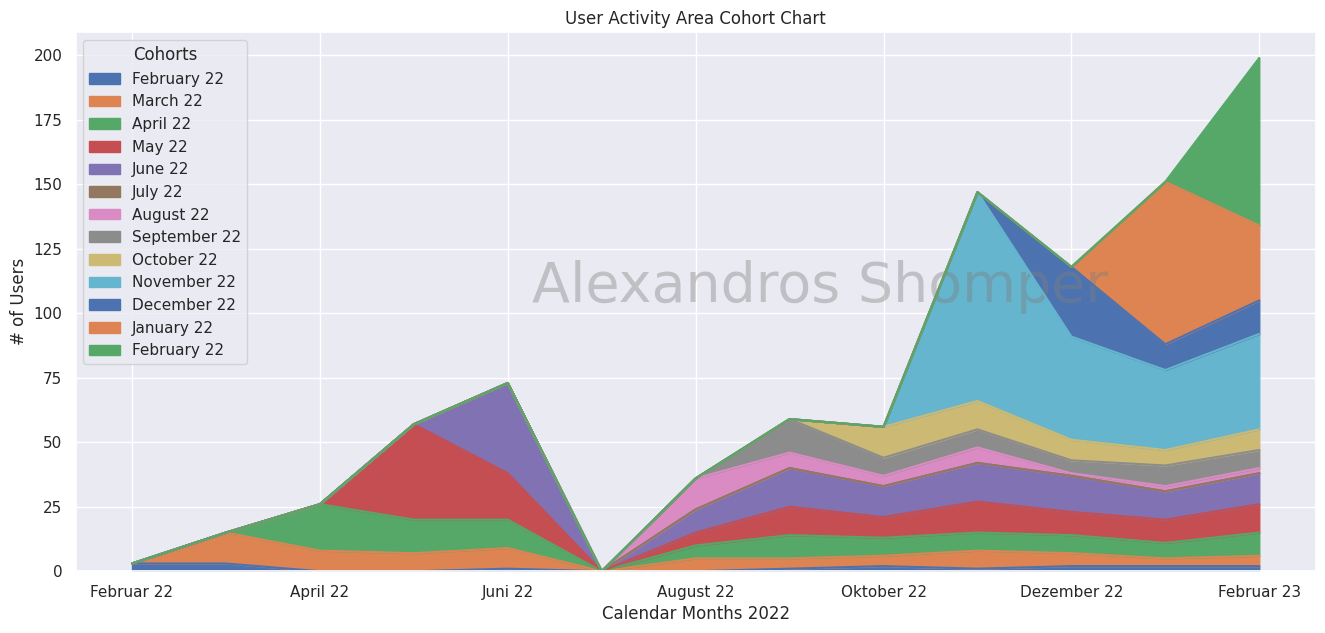

In [ ]:
user_activity_area = cohort_absolute_calendarweeks.iloc[0:].T.plot(kind='area', stacked=True).set(title='User Activity Area Cohort Chart', xlabel='Calendar Months 2022', ylabel='# of Users')
plt.text(0.5, 0.5, 'Alexandros Shomper', transform=ax.transAxes, fontsize=40, color='gray', alpha=0.4, ha='center', va='center', rotation=0, zorder=1)

## Cohort Charts

### Retention Cohort Percentage
This shows the percentage of users stayed after a certain timeperiod.

Text(0.5, 0.5, 'Alexandros Shomper')

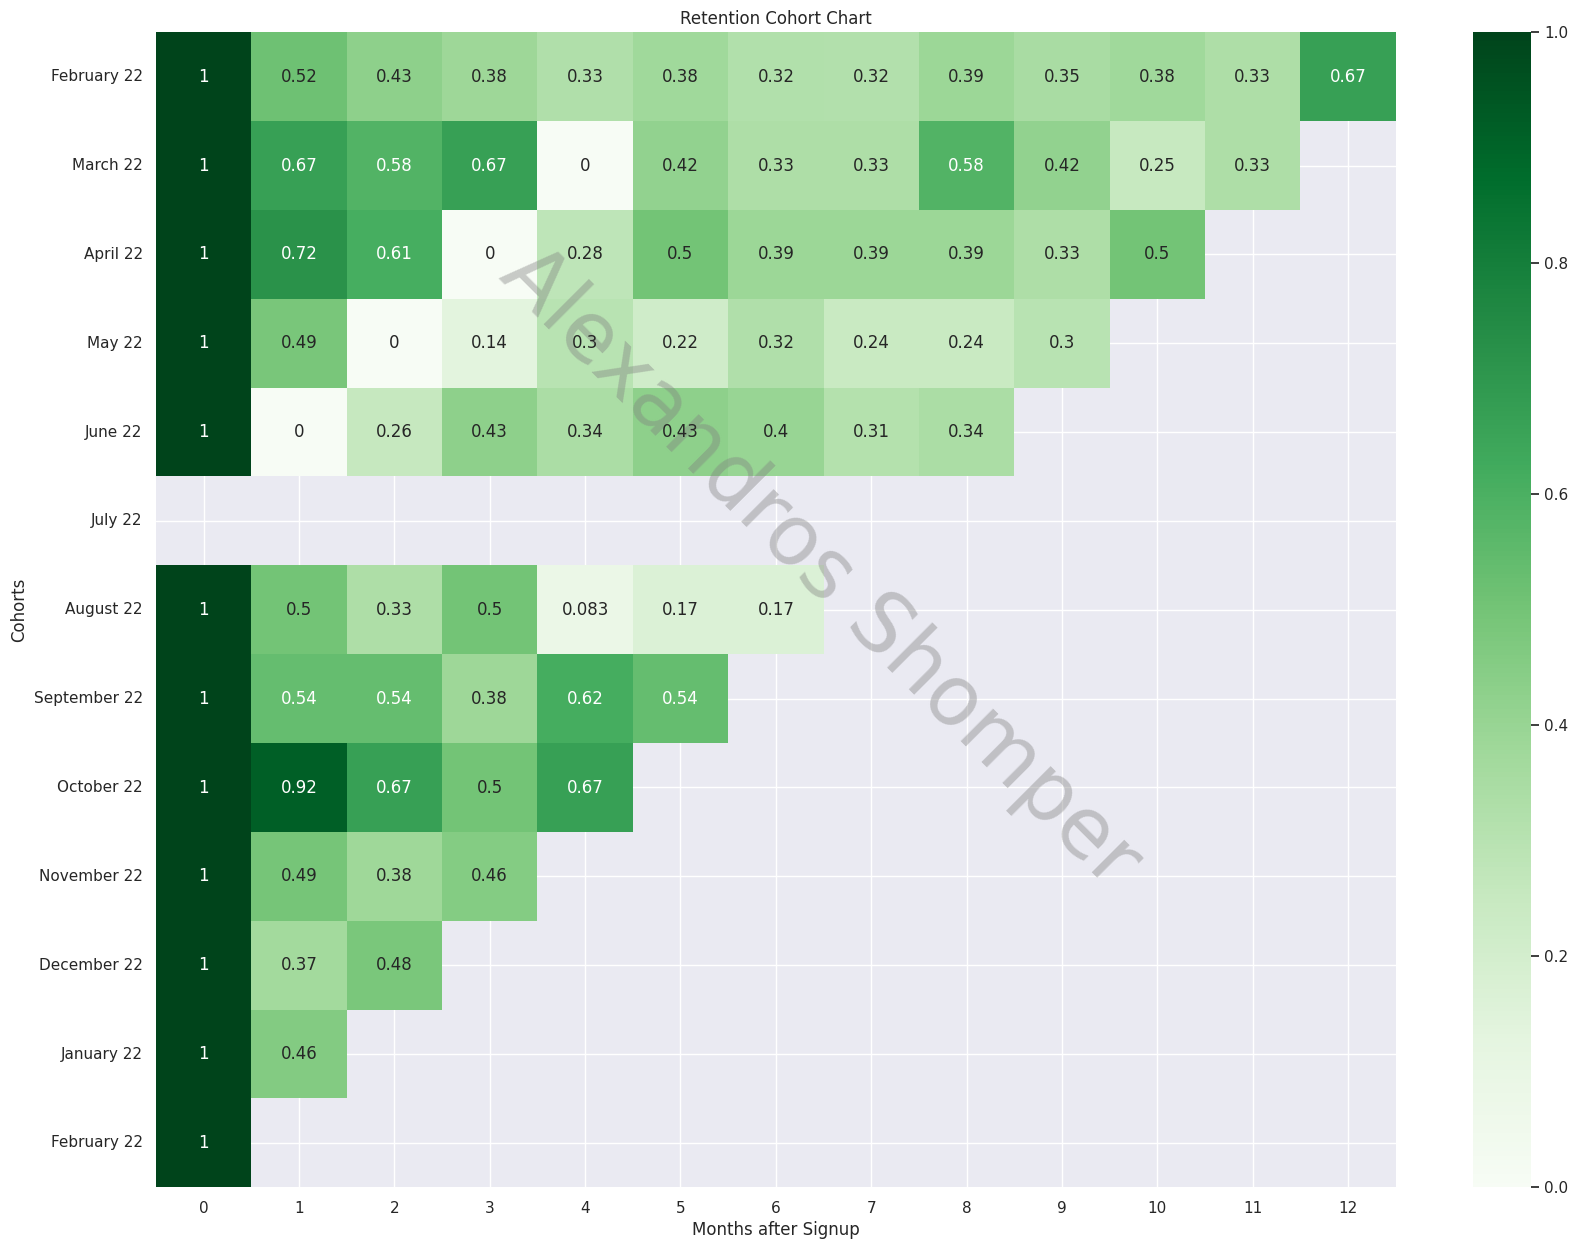

In [ ]:
plt.figure(figsize=(20, 15))
retention_cohortchart = sns.heatmap(cohort_retention_percentage_weekscount, cmap="Greens", annot=True).set(title='Retention Cohort Chart', xlabel='Months after Signup')
plt.text(0.5, 0.5, 'Alexandros Shomper', transform=ax.transAxes, fontsize=60, color='gray', alpha=0.4, ha='center', va='bottom', rotation=-45, zorder=1)

### Churn Cohort Percentage
This shows the percentage of the starting cohort that was lost in each time period. 

Text(0.5, 0.5, 'Alexandros Shomper')

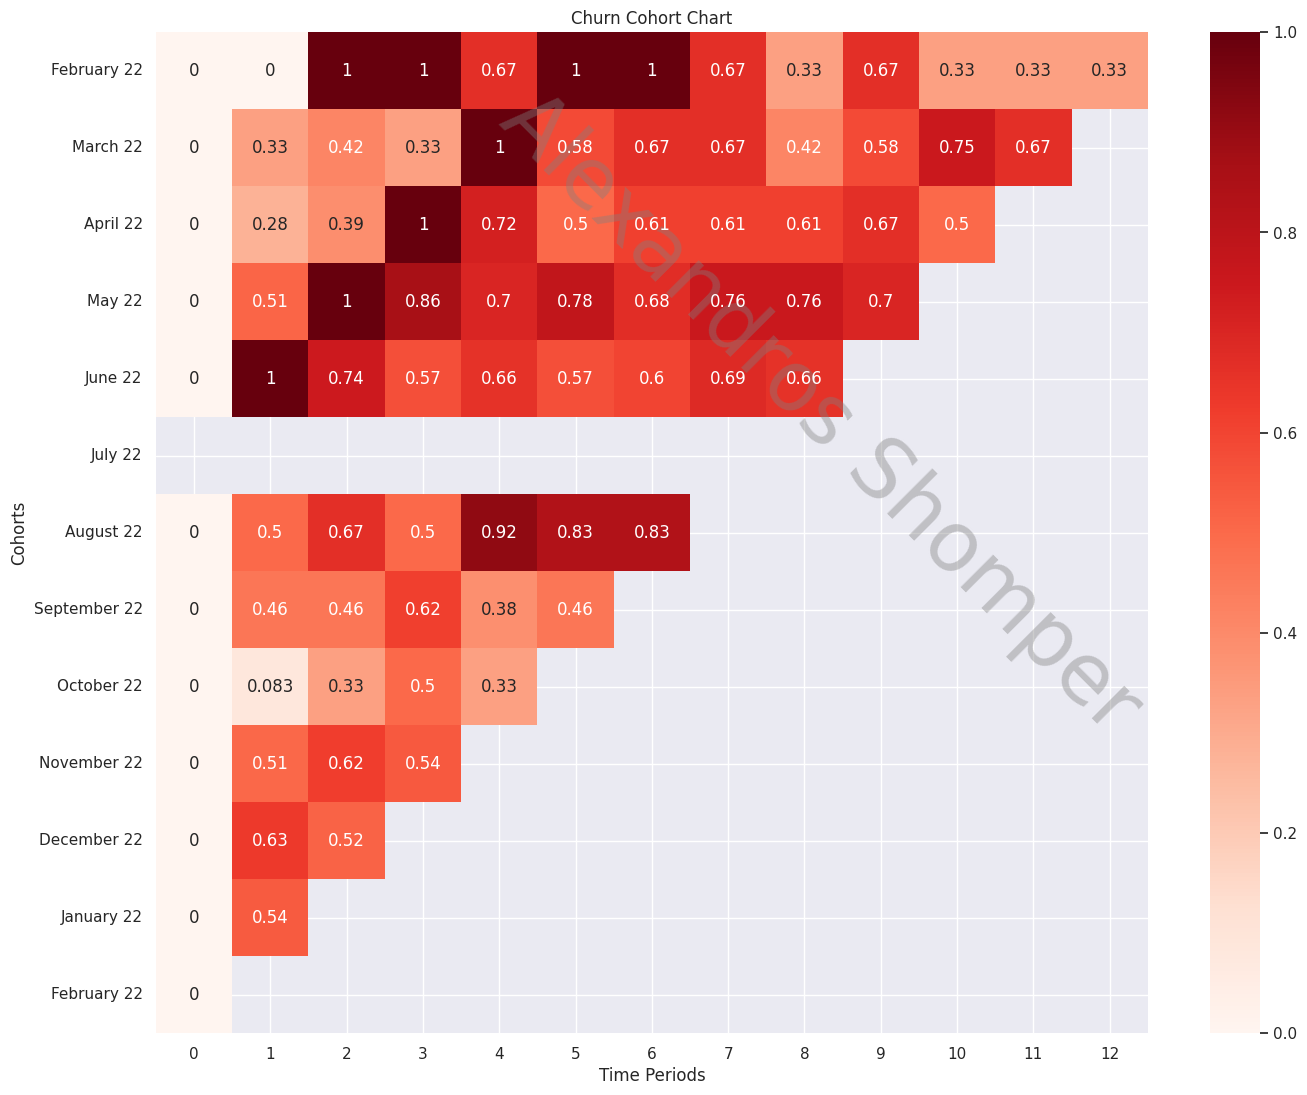

In [ ]:
plt.figure(figsize=(16, 13))
churn_cohortchart = sns.heatmap(cohort_churn_percentage_weekscount, cmap="Reds", annot=True).set(title='Churn Cohort Chart', xlabel='Time Periods')
plt.text(0.5, 0.5, 'Alexandros Shomper', transform=ax.transAxes, fontsize=60, color='gray', alpha=0.4, ha='center', va='bottom', rotation=-45, zorder=1)

## Retention

### Average Retention Curve

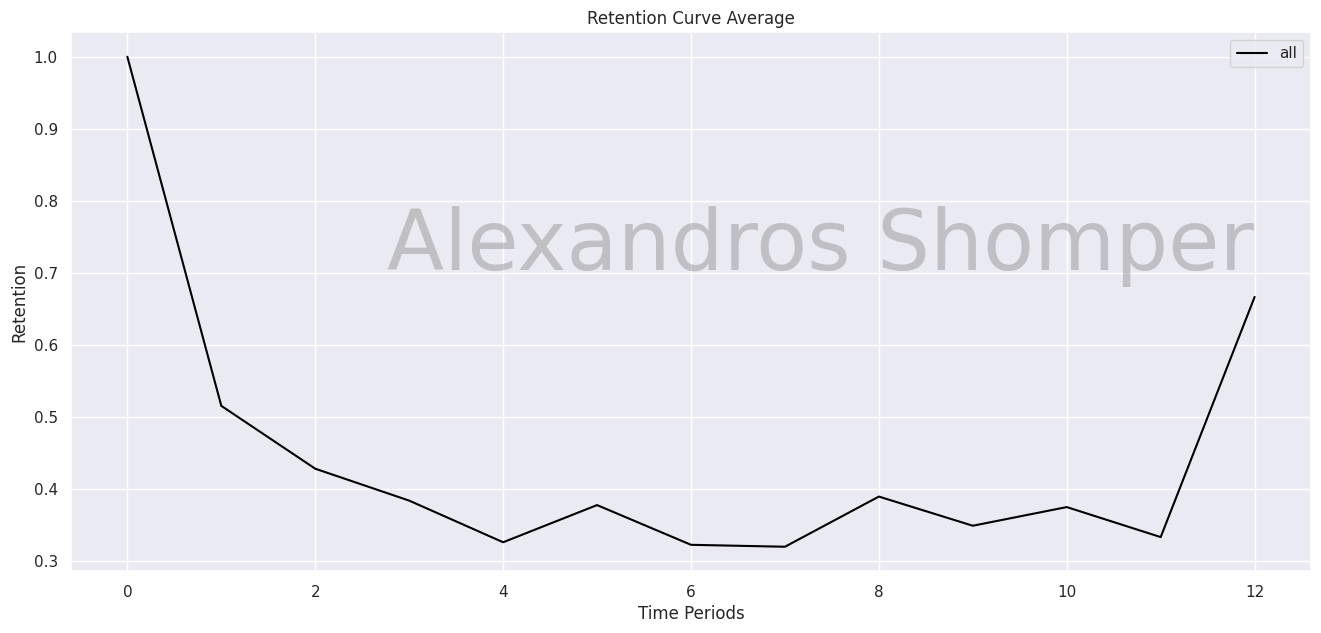

In [ ]:
#plt.figure(figsize=(16, 7))
plt.title("Retention Curve Average")
plt.xlabel("Time Periods")
plt.ylabel("Retention")
plt.plot(get_retention(cohort_retention_percentage_weekscount),color='black', label="all")
plt.legend()
plt.text(0.5, 0.5, 'Alexandros Shomper', transform=ax.transAxes, fontsize=60, color='gray', alpha=0.4, ha='center', va='bottom', rotation=0, zorder=1)
plt.show()

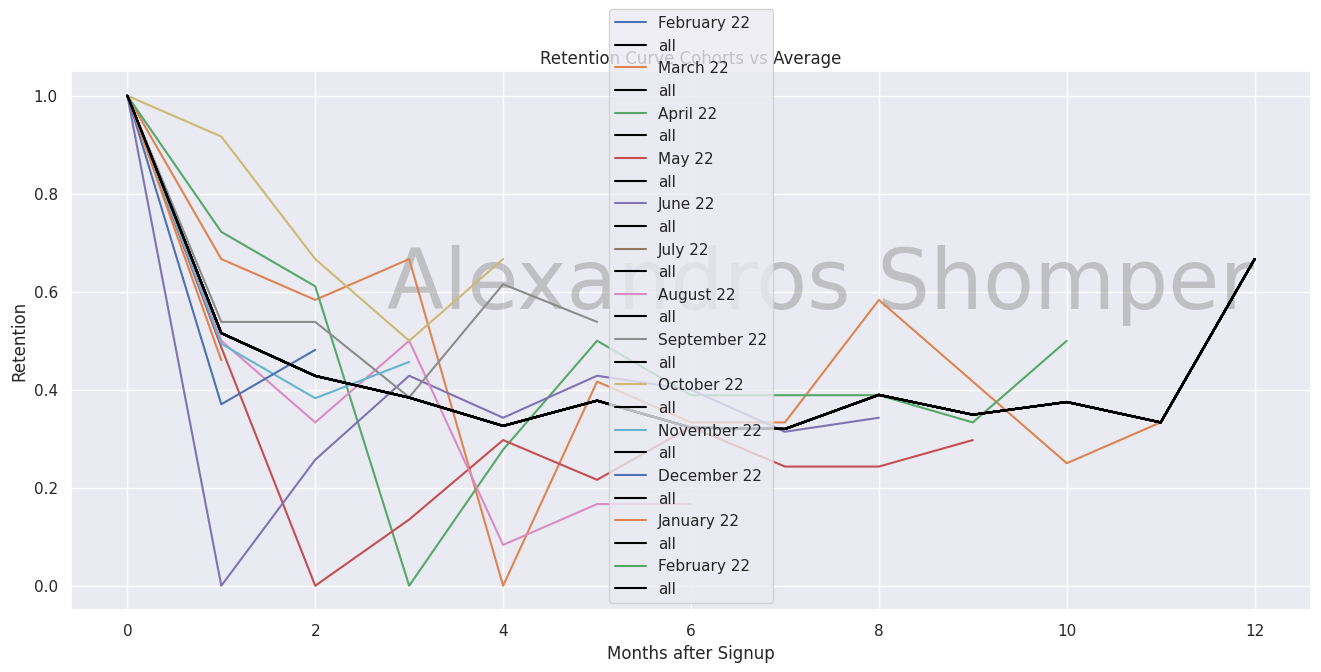

In [ ]:
plt.title("Retention Curve Cohorts vs Average")
plt.xlabel("Months after Signup")
plt.ylabel("Retention")
for i in range(len(cohort_retention_percentage_weekscount)): 
  plt.plot(cohort_retention_percentage_weekscount.iloc[i].index, cohort_retention_percentage_weekscount.iloc[i].values, label=cohort_retention_percentage_weekscount.iloc[i].name)
  plt.plot(get_retention(cohort_retention_percentage_weekscount), color='black', label="all")
plt.legend()
plt.text(0.5, 0.5, 'Alexandros Shomper', transform=ax.transAxes, fontsize=60, color='gray', alpha=0.4, ha='center', va='bottom', rotation=0, zorder=1)
plt.show()

# Numbers & Trends

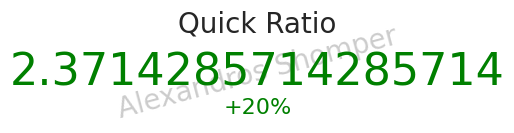

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

quick_ratio_score = plt
fig = quick_ratio_score.figure(figsize=(3, 1))
ax = fig.add_axes([0,0,1,1])

# axes coordinates are 0,0 is bottom left and 1,1 is upper right
p = patches.Rectangle(
    (left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False
    )

ax.add_patch(p)

x=quick_ratio.iloc[0].values[-2]
y=quick_ratio.iloc[0].values[-1]
z=y-x

#Metric
ax.text(0.5*(left+right), 0.8*(bottom+top)+0.05, 'Quick Ratio',
        horizontalalignment='center',
        verticalalignment='bottom',
        fontsize=20,
        transform=ax.transAxes)
#Value
if y < 1:
            ax.text(0.5*(left+right), 0.5*(bottom+top), y,
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=32, color='red',
            transform=ax.transAxes)

elif y > 1:
            ax.text(0.5*(left+right), 0.5*(bottom+top), y,
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=32, color='green',
            transform=ax.transAxes)
else:
            ax.text(0.5*(left+right), 0.5*(bottom+top), y,
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=32, color='black',
            transform=ax.transAxes)

#Trend
if z/x < 0:
            ax.text(0.5*(left+right), 0.3*(bottom+top)-0.05, "-"+"{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='red',
            transform=ax.transAxes)

elif z/x > 0:
            ax.text(0.5*(left+right), 0.3*(bottom+top)-0.05, "+"+"{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='green',
            transform=ax.transAxes)
else:
            ax.text(0.5*(left+right), 0.3*(bottom+top)-0.05, "{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='black',
            transform=ax.transAxes)

ax.set_axis_off()
plt.text(0.5, 0.5, 'Alexandros Shomper', transform=ax.transAxes, fontsize=20, color='gray', alpha=0.4, ha='center', va='center', rotation=15, zorder=1)
quick_ratio_score.show()

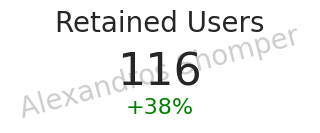

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

retained_users_score = plt
fig = retained_users_score.figure(figsize=(3, 1))
ax = fig.add_axes([0,0,1,1])

# axes coordinates are 0,0 is bottom left and 1,1 is upper right
p = patches.Rectangle(
    (left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False
    )

ax.add_patch(p)

x=user_activity.loc['Retained Users'].values[-2]
y=user_activity.loc['Retained Users'].values[-1]
z=y-x

#Metric
ax.text(0.5*(left+right), 0.8*(bottom+top)+0.05, 'Retained Users',
        horizontalalignment='center',
        verticalalignment='bottom',
        fontsize=20,
        transform=ax.transAxes)
#Value
ax.text(0.5*(left+right), 0.5*(bottom+top), y,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=32,
        transform=ax.transAxes)
#Trend

if z/x < 0:
            ax.text(0.5*(left+right), 0.3*(bottom+top)-0.05, "-"+"{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='red',
            transform=ax.transAxes)

elif z/x > 0:
            ax.text(0.5*(left+right), 0.3*(bottom+top)-0.05, "+"+"{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='green',
            transform=ax.transAxes)
else:
            ax.text(0.5*(left+right), 0.3*(bottom+top)-0.05, "{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='black',
            transform=ax.transAxes)

ax.set_axis_off()
plt.text(0.5, 0.5, 'Alexandros Shomper', transform=ax.transAxes, fontsize=20, color='gray', alpha=0.4, ha='center', va='center', rotation=15, zorder=1)
retained_users_score.show()

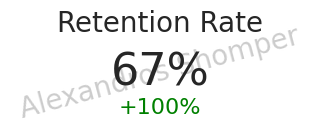

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

retention_rate_score = plt
fig = retention_rate_score.figure(figsize=(3, 1))
ax = fig.add_axes([0,0,1,1])

# axes coordinates are 0,0 is bottom left and 1,1 is upper right
p = patches.Rectangle(
    (left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False
    )

ax.add_patch(p)
x=get_retention(cohort_retention_percentage_weekscount).values[-2]
y=get_retention(cohort_retention_percentage_weekscount).values[-1]
z=y-x
#Metric
ax.text(0.5*(left+right), 0.8*(bottom+top)+0.05, 'Retention Rate',
        horizontalalignment='center',
        verticalalignment='bottom',
        fontsize=20,
        transform=ax.transAxes)
#Value
ax.text(0.5*(left+right), 0.5*(bottom+top), "{0:.0f}%".format(y * 100),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=32,
        transform=ax.transAxes)
#Trend
if z/x < 0:
            ax.text(0.5*(left+right), 0.3*(bottom+top)-0.05, "-"+"{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='red',
            transform=ax.transAxes)
elif z/x > 0:
            ax.text(0.5*(left+right), 0.3*(bottom+top)-0.05, "+"+"{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='green',
            transform=ax.transAxes)
else:
            ax.text(0.5*(left+right), 0.3*(bottom+top)-0.05, "{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='black',
            transform=ax.transAxes)

ax.set_axis_off()
plt.text(0.5, 0.5, 'Alexandros Shomper', transform=ax.transAxes, fontsize=20, color='gray', alpha=0.4, ha='center', va='center', rotation=15, zorder=1)
retention_rate_score.show()